ANN-PSO for Cubic function approximation using linear activation function: ANN architecture ANN Forward Pass Paricle Swarm Data Execution

In [15]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
#ANN architecture : 3 layers and neurons in each layer
Input = 1
Hidden = 5
Output = 1

In [55]:
#to capture MSEs
MSE = []
Desired = []
Actual = []

#ANN information pass
def forward_pass(input_X, output_Y, W):

     
    if isinstance(W, Particle):
        W = W.p

    #weight and bias from input to hidden     
    w1 = W[0 : Input * Hidden].reshape((Input, Hidden))
    b1 = W[Input * Hidden:(Input * Hidden) + Hidden].reshape((Hidden, ))
    
    #weight and bias from hidden to output
    w2 = W[(Input * Hidden) + Hidden:(Input * Hidden) + Hidden +\
        (Hidden * Output)].reshape((Hidden, Output))
    b2 = W[(Input * Hidden) + Hidden + (Hidden * Output): (Input *\
        Hidden) + Hidden + (Hidden * Output) + Output].reshape((Output, ))

    #infomration pass using sigmoid activation function
    z1 = np.dot(input_X, w1) + b1
    a1 = linear(z1)
    z2 = np.dot(a1, w2) + b2
    output_from_outputlayer = linear(z2)
    
    Desired.append(output_Y)
    Actual.append(output_from_outputlayer)
   
    #mean squared error   
    mserror1 = (np.power((output_from_outputlayer - output_Y), 2)) # **2
    mserror = (mserror1.sum()/100)
    MSE.append(mserror)
    print(mserror)
    
    
            
    return mserror

In [86]:
class Particle:
   
    def __init__(self, dims, p_range, v_range):
        
        #dims = number of dimensions
        #p= position of the particle in the dimentional space
        #v = velocity of the particle in the dimensional space
        #p_range = range of dimensions 
        #v_range = range of velocities
        
        #let the position and velocity of a praticle be randomly selected from uniform distribution
        self.p = np.random.uniform(p_range[0], p_range[1], (dims, ))
        self.v = np.random.uniform(v_range[0], v_range[1], (dims, )) 
        
        #the best position for any particle can be positive infinity
        self.pbest = float('inf') #-1 #np.inf
        
        #define particles best position based on specified dimensions
        self.pbestpos = np.zeros((dims, ))

In [87]:
class Swarm:
    
    def __init__(self, particle_no, dims, p_range, v_range, alpha_range, component):
        
        #particle_no = number of particles
        #dims = dimensions
        #p_range = range of dimensions 
        #v_range = range of velocities
        #alpha_range = inertia weight range
        #components = cognetive and social components
        
        
        #define the swarm with praticles from Class Particle
        self.p = np.array([Particle(dims, p_range, v_range) for i in range(particle_no)])
        
        #define global best as infinity
        self.gbest = 0 #float('inf')  #np.inf
        
        #define global best poition
        self.gbestpos = np.zeros((dims, ))
        
        self.p_range = p_range
        self.v_range = v_range
        
        self.alpha_range = alpha_range
        
        #components
        self.component0 = component[0] #cognetive
        self.component1 = component[1] #social
        self.dims = dims
        
        
       
    def optimize(self, function, input_X, output_Y,  print_step,  iter):
        informants = 6
        for i in range(iter):
            for particle in self.p:
                fitness = function(input_X, output_Y, particle.p)

                #select the particles best position
                if  fitness.any() < particle.pbest:
                    particle.pbest = fitness.any()
                    particle.pbestpos = particle.p.copy()
                    
            for i in range(informants):
                for particle in self.p:          
                
                #select the global best position    
                 if fitness.any()> self.gbest:
                    self.gbest = fitness.any()
                    self.gbestpos = particle.p.copy()
                    

            for particle in self.p:
               
                alpha = np.random.uniform(self.alpha_range[0], self.alpha_range[1], 1)[0]
                
                #velocity update formula
                particle.v = alpha * particle.v + (self.component0 * np.random.uniform(0.0, 1.0, (self.dims, )) * \
                (particle.pbestpos - particle.p)) + (self.component1 * np.random.uniform(0.0, 1.0, (self.dims, )) \
                * (self.gbestpos - particle.p))
                epsilon = 0.2
               
                particle.p = particle.p + epsilon * particle.v
                
        
    def get_best_solution(self):
    
        return self.gbestpos   

In [58]:
#activation function and data conversion function
def linear(x):
    return x

In [59]:
#X input for which function approximation is carried out
import csv
with open("X_linear.csv", 'r') as f:
    Xin = list(csv.reader(f, delimiter=";"))
import numpy as np
Xin = np.array(Xin[1:], dtype=np.float)
input_X= Xin

In [60]:
# for sine approximation
def sine(x):
    return np.sin(x)

In [61]:
output_Y = linear(sine(input_X))

In [88]:
    #define the PSO hyperparameters
    
    no_solution = 1
 
    dims = (Input * Hidden) + Hidden + (Hidden * Output) + Output
    w_range = (-0.01,0.09)
    lr_range = (0.05, 0.25)
    alpha_range = (0.9,0.9)  
    components = (1.7,3.2)  
    
    s = Swarm(no_solution, dims, w_range, lr_range, alpha_range, components)
    
    iterations = 200
    s.optimize(forward_pass, input_X, output_Y, 100,iterations)
    
    W = s.get_best_solution()   

0.27104139901428154
0.2647835292941073
0.2613640955973783
0.26487006223160436
0.2711182231904788
0.2746562663897908
0.27466969701811683
0.27456289759233654
0.272514143235047
0.26819377875839157
0.265310773503593
0.2664572620887167
0.2690220541564632
0.2715633976928213
0.27259150715057884
0.2732096901836756
0.2735221236283785
0.2735174896973586
0.2712392454573647
0.268930966479724
0.2678862274227103
0.2675739836336723
0.26970249329523016
0.27189240538223
0.27267954229304786
0.27258102571010123
0.2715466064826471
0.2702039513111383
0.2697426028571265
0.27023915866239195
0.2711035336743102
0.271646828254577
0.2718620831549139
0.27194616928080717
0.27161371904990483
0.27071809337054636
0.270137580658325
0.27010909985931825
0.2705964733694885
0.2711584320406907
0.2716205868822212
0.2719206401782418
0.2716377278138751
0.2709964534754942
0.2702428087115491
0.2703810505204709
0.2711804980905951
0.27191669497449367
0.2720754031701268
0.2720341953453396
0.27147649544822555
0.27066540846150483
0.

<ipython-input-89-8eaaf908276e>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  g = graph_ms.add_subplot()


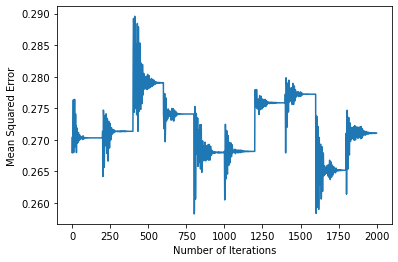

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
graph_ms = plt.figure()
g =plt.xlabel("Number of Iterations")
g =plt.ylabel("Mean Squared Error")
g = graph_ms.add_subplot()
g.plot(MSE)